<a href="https://colab.research.google.com/github/WittmannF/udemy-deep-learning/blob/master/3-primeira-rn-keras/problema_brinquedo_resolvido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Construindo uma Rede Neural Brinquedo

Vamos usar o mesmo exemplo que temos visto no vídeo anterior com o preço de casa com base em sua área.
Normalmente, quando se trabalha com problemas de aprendizagem de máquina ou deep learning, você deverá seguir esses cinco passos:
1. Explorando os dados
  - Importação de dados
  - Compreender os dados
2. Preparar os dados
  - Escalar os dados
  - Transformações
  - One-Hot Encoding
  - Divisão treino/teste
3. Desenvolver um modelo simples como base
4. Verificar resultados
5. Melhorar resultados

Vamos cobrir alguns deles aqui!
## 1. Importar os Dados

Vamos criar um conjunto de dados brinquedo com apenas 20 áreas e 20 preços

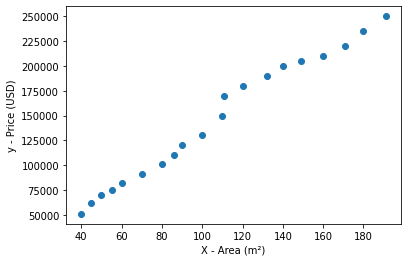

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# House areas (feature)
X = np.array([40, 45, 50, 55, 60, 70, 80, 86, 90, 100, 110, 111, 120, 132, 140, 149, 160, 171, 180, 191]).reshape(-1, 1)

# House prices (prediction variable)
y = np.array([51000, 62000, 70100, 75245, 82200, 91200, 101000, 110200, 120000, 130000, 150000, 170000, 180000, 190000, 200000, 205000, 210000, 220000, 235000, 250000]).reshape(-1, 1)

# Visualize X and Y
plt.scatter(X, y)
plt.xlabel("X - Area (m²)")
plt.ylabel("y - Price (USD)")
plt.show()

## 2. Preparar os dados
### Escalando Atributos Numéricos
Otimizadores geralmente funcionam melhor quando os dados de entrada então dentro de intervalos entre -1 a 1 ou 0 a 1. Isto ajuda a superfície de erro a aproximar mais rápido de seu mínimo global. Para melhores resultados, a classe do Sklearn [Standardization](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) é altamente recomendada por termos um conjunto de dados com média igual a zero e um desvio padrão igual à 1:

The mean of X is 107.0 The Standard Deviation of X is 46.0
Applying standardization...
The mean of X is 0.0 The Standard Deviation of X is 1.0


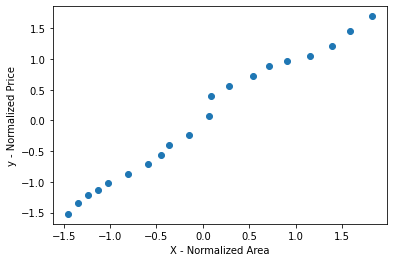

In [2]:
from sklearn.preprocessing import StandardScaler

# Check mean and standard deviation before
print("The mean of X is {:.1f} The Standard Deviation of X is {:.1f}".format(np.mean(X), np.std(X)))

# Apply transformation
print("Applying standardization...")
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y)

# Check mean and standard deviation after
print("The mean of X is {:.1f} The Standard Deviation of X is {:.1f}".format(np.mean(X), np.std(X)))


# Visualize again
plt.scatter(X, y)
plt.xlabel("X - Normalized Area")
plt.ylabel("y - Normalized Price")
plt.show()

### Divisão de Dados Treinamento/Teste
Além de escalar os dados, é muito importante dividir os dados para subconjuntos de treinamento e testes. O conjunto de treinamento vai ser usado para definir o modelo (ou o fronteira de decisão) e o conjunto de teste vai ser usado para avaliar o seu desempenho para dados novos. Se não utilizarmos um conjunto de teste, há um risco de **overfitting**, ilustrado a seguir:
![](https://user-images.githubusercontent.com/5733246/52140129-23600f00-2639-11e9-8c03-308823791377.png)
A divisão treinamento/teste pode ser realizada utilizando a função train_test_split do sklearn:

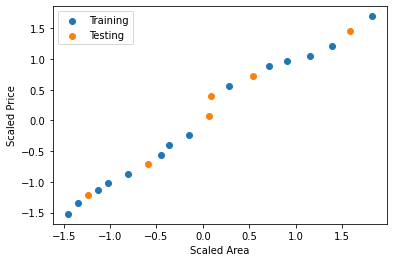

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

# Visualize again
plt.scatter(X_train, y_train, label="Training")
plt.scatter(X_test, y_test, label="Testing")
plt.legend(loc=0)
plt.xlabel("Scaled Area")
plt.ylabel("Scaled Price")
plt.show()

## 3. Desenvolvendo um modelo base

Vamos agora usar Keras, a fim de construir o nosso primeiro modelo. Ao definir um modelo, há três componentes principais que você tem que estar ciente:

1. A arquitetura do Modelo: Como são camadas empilhadas umas sobre as outras? Quais camadas estão indo para ser usado?
- Documentação de Camadas: https://keras.io/layers/core/
    - Sequential API: https://keras.io/getting-started/sequential-model-guide/

2. Otimizadores e função de custo (erro).
- Documentação de otimizadores: https://keras.io/optimizers/
- Documentação de tipos de funções de custo: https://keras.io/losses/
- Métodos de compilação: https://keras.io/models/sequential/#compile

3. Treinamento do modelo
- Método Fit: https://keras.io/models/sequential/#fit

Com base na documentações anteriores, vamos definir o modelo de base como um único neurónio, com apenas um peso e um viés com a seguinte aparência:
![](https://user-images.githubusercontent.com/5733246/52482541-ad0f5f80-2b98-11e9-927c-a37ead68bf90.png)

[Esta referência](https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc) pode ser útil para a definição de um modelo.


In [ ]:
# 0. Import keras dependencies 
# TODO: Import the sequential model - https://keras.io/getting-started/sequential-model-guide/

# TODO: Import the dense layer - https://keras.io/layers/core/

# TODO: Import the SGD optimizer - https://keras.io/optimizers/

# 1. Define your base model here
# TODO: Assign Sequential to model and create a list with just one Dense layer with one unit and one input
model = None

# 2. Set your optimizer and loss function here
# TODO: Initialize the Stochastic Gradient Descent optimizer

# TODO: Use the model.compile method with the inputs 'optimizer' and 'loss'
model.compile(...)

# 3. Train your model
# TODO: Use the model.fit method with the the training data as input
model.fit(...)

Solução:

In [5]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(1,))
    ])

# 2. Set your optimizer and loss function here
opt = SGD()
model.compile(optimizer=opt,
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train)

1/1 [==============================] - 0s 2ms/step - loss: 1.0942


## 4. Verificando as previsões
Vamos agora verificar visualmente como o modelo base está se saindo ao prever valores:

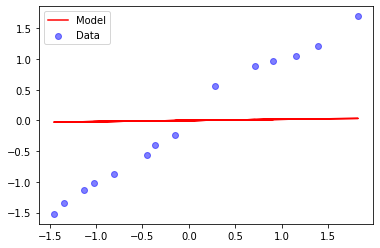

In [6]:
def check_predictions(model, X, y):
    y_pred = model.predict(X)
    plt.scatter(X, y, c='b', alpha=0.5, label="Data")
    plt.plot(X, y_pred, c='r', label="Model")
    plt.legend(loc=0)
    plt.show()
    
check_predictions(model, X_train, y_train)

## 5. Melhorando os Resultados
Podemos ver que o modelo não está se saindo bem nem mesmo no conjunto de treino (isso chama-se underfitting). Vamos agora melhorar esses resultados! Aqui estão algumas coisas básicas que você pode tentar:
1. Aumentar o número de épocas
- Épocas é o número de vezes que o algoritmo vê todo o conjunto de dados. Não confundir com `batch_size` no qual é o número de pontos que a rede neural lê para atualizar os pesos, seu valor padrão é 32. Como há menos de 32 pontos aqui, o número de épocas acaba sendo também o número de iterações em cima do peso da rede neural.

2. Alterar o otimizador
- Descida do gradiente estocástico é um otimizador bastante simples. Há mais otimizadores mais robustos como Adam

4. Alterar a taxa de aprendizagem (learning rate)

### 5.1 Aumentando o número de épocas

In [7]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(1,))
    ])

# 2. Set your optimizer and loss function here
opt = SGD()
model.compile(optimizer=opt,
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 1ms/step - loss: 4.5239
Epoch 2/20
1/1 [==============================] - 0s 998us/step - loss: 4.3287
Epoch 3/20
1/1 [==============================] - 0s 882us/step - loss: 4.1419
Epoch 4/20
1/1 [==============================] - 0s 2ms/step - loss: 3.9633
Epoch 5/20
1/1 [==============================] - 0s 2ms/step - loss: 3.7923
Epoch 6/20
1/1 [==============================] - 0s 893us/step - loss: 3.6288
Epoch 7/20
1/1 [==============================] - 0s 2ms/step - loss: 3.4724
Epoch 8/20
1/1 [==============================] - 0s 2ms/step - loss: 3.3227
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 3.1795
Epoch 10/20
1/1 [==============================] - 0s 3ms/step - loss: 3.0425
Epoch 11/20
1/1 [==============================] - 0s 3ms/step - loss: 2.9115
Epoch 12/20
1/1 [==============================] - 0s 3ms/step - loss: 2.7861
Epoch 13/20
1/1 [==============================] - 0s 3ms/step - lo

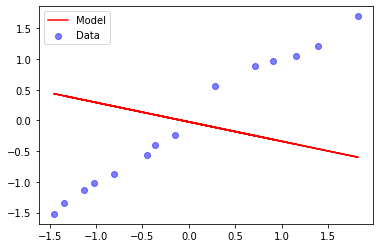

In [8]:
check_predictions(model, X_train, y_train)

### 5.2 Testando outros otimizadores
Esta referência tem uma ótima visualização de diferentes otimizadores do TensorFlow: https://github.com/Jaewan-Yun/optimizer-visualization

![](https://github.com/Jaewan-Yun/optimizer-visualization/raw/master/figures/movie11.gif)

Vamos agora tentar outros otimizadores que estão disponíveis a partir da documentação: https://keras.io/optimizers/

In [9]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(1,))
    ])

# 2. Set your optimizer loss function here
opt = Adam()
model.compile(optimizer=opt,
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 1ms/step - loss: 0.0254
Epoch 2/20
1/1 [==============================] - 0s 1ms/step - loss: 0.0252
Epoch 3/20
1/1 [==============================] - 0s 1ms/step - loss: 0.0249
Epoch 4/20
1/1 [==============================] - 0s 4ms/step - loss: 0.0247
Epoch 5/20
1/1 [==============================] - 0s 2ms/step - loss: 0.0245
Epoch 6/20
1/1 [==============================] - 0s 2ms/step - loss: 0.0242
Epoch 7/20
1/1 [==============================] - 0s 2ms/step - loss: 0.0240
Epoch 8/20
1/1 [==============================] - 0s 4ms/step - loss: 0.0238
Epoch 9/20
1/1 [==============================] - 0s 1ms/step - loss: 0.0235
Epoch 10/20
1/1 [==============================] - 0s 980us/step - loss: 0.0233
Epoch 11/20
1/1 [==============================] - 0s 1ms/step - loss: 0.0231
Epoch 12/20
1/1 [==============================] - 0s 1ms/step - loss: 0.0229
Epoch 13/20
1/1 [==============================] - 0s 1ms/step - loss: 

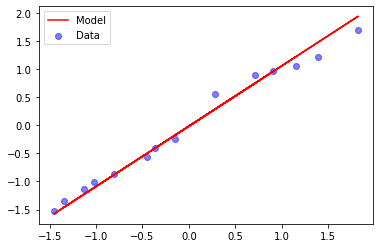

In [10]:
check_predictions(model, X_train, y_train)

### 5.3 Ajustando a Taxa de Aprendizagem
Finalmente vamos aumentar a taxa de aprendizagem. Como um lembrete, valores pequenos requerem mais iterações, enquanto valores grandes podem divergir o modelo.

In [11]:
# 0. Import keras dependencies here
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# 1. Define your base model here
model = Sequential([
        Dense(units=1, input_shape=(1,))
    ])

# 2. Set your optimizer and loss function here
opt = Adam(lr=0.1) # Default of adam is 0.001. Check large and small values, use a value slighly lower than a diverging lr
model.compile(optimizer=opt,
             loss='mean_squared_error')


# 3. Train your model
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 1ms/step - loss: 1.5605
Epoch 2/20
1/1 [==============================] - 0s 975us/step - loss: 1.3103
Epoch 3/20
1/1 [==============================] - 0s 3ms/step - loss: 1.0854
Epoch 4/20
1/1 [==============================] - 0s 2ms/step - loss: 0.8797
Epoch 5/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6989
Epoch 6/20
1/1 [==============================] - 0s 2ms/step - loss: 0.5428
Epoch 7/20
1/1 [==============================] - 0s 2ms/step - loss: 0.4081
Epoch 8/20
1/1 [==============================] - 0s 2ms/step - loss: 0.2945
Epoch 9/20
1/1 [==============================] - 0s 2ms/step - loss: 0.2028
Epoch 10/20
1/1 [==============================] - 0s 4ms/step - loss: 0.1323
Epoch 11/20
1/1 [==============================] - 0s 2ms/step - loss: 0.0804
Epoch 12/20
1/1 [==============================] - 0s 2ms/step - loss: 0.0445
Epoch 13/20
1/1 [==============================] - 0s 1ms/step - loss: 

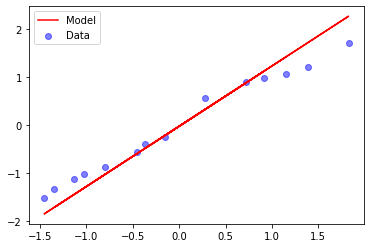

In [12]:
check_predictions(model, X_train, y_train)

## Considerações Finais
Finalmente, também pode tentar usar mais camadas no modelo. No entanto, primeiramente é importante estudar as diferentes funções de ativação que podem ser usadas.